In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np

In [2]:
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit2qubit = QuantumCircuit(qr,cr)
qc = groverCircuit2qubit

In [4]:
# circuit
qc.h(qr)
qc.barrier()

qc.x(qr[0])
qc.cz(qr[0], qr[1])
qc.x(qr[0])
qc.barrier()

qc.h(qr)
qc.barrier()

qc.z(qr)
qc.cz(qr[0],qr[1])
qc.barrier()

qc.h(qr)

qc.measure(qr,cr)

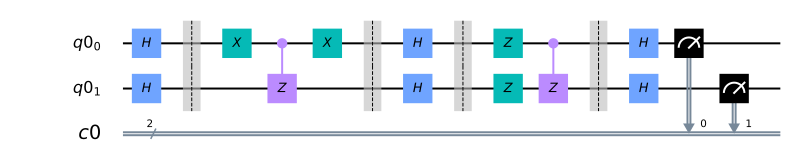

In [5]:
qc.draw(output='mpl')

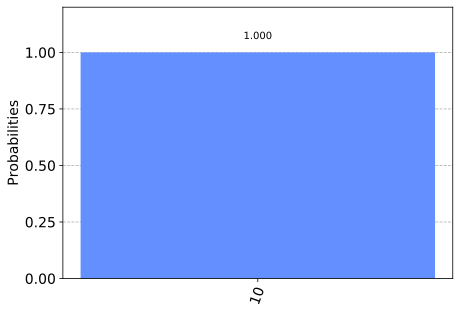

In [6]:
# run simulation
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=8192).result()
answer = results.get_counts()
plot_histogram(answer)